# Example 4 - Switches

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, VoltageSource, LabelNode, Switch, SwitchState
from CircuitCalculator.SimpleCircuit.DiagramSolution import real_network_dc_solution

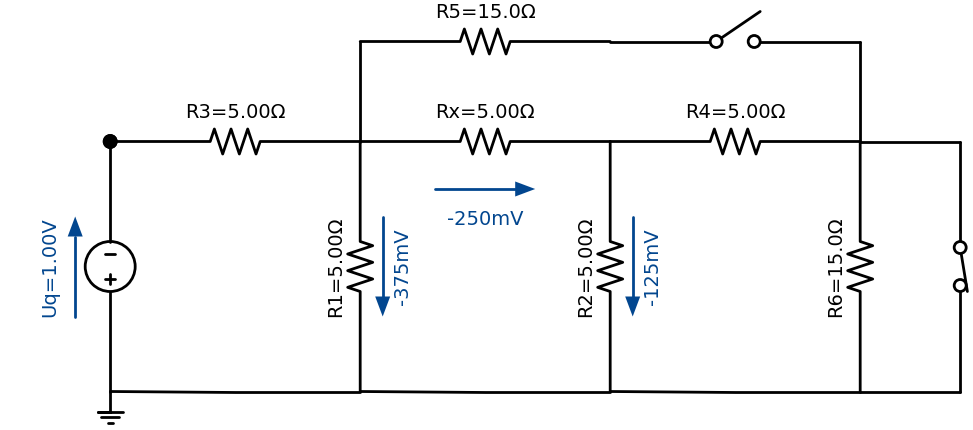

In [2]:
R = 5
U0 = 1

with Schematic(unit=(u:=5)) as s:
    s += VoltageSource(V=U0, name='Uq').up()
    s += LabelNode('N1')
    s += Resistor(R=R, name='R3').right()
    s += Resistor(R=R, name='R1').down()
    s += Line().left()
    s += Ground()
    s += Resistor(R=R, name='Rx').at(s['R3'].end).right()
    s += Resistor(R=R, name='R2').down()
    s += Line().left()
    s += Resistor(R=R, name='R4').at(s['Rx'].end).right()
    s += Resistor(R=3*R, name='R6').down()
    s += Line().at(s['R3'].end).up(length=2*u/5)
    s += Resistor(R=3*R, name='R5').right()
    s += Switch(name='S1', state=SwitchState.OPEN).right()
    s += Line().down(length=2)
    s += Line().at(s['R6'].start).right(length=2*u/5)
    s += Switch(name='S2', state=SwitchState.CLOSED).down()
    s += Line().left(length=2*u/5)
    s += Line().left()
    schemdraw_solution = real_network_dc_solution(schematic=s)
    s += schemdraw_solution.draw_voltage('R1')
    s += schemdraw_solution.draw_voltage('Rx')
    s += schemdraw_solution.draw_voltage('R2', reverse=False)



In [3]:
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator
from CircuitCalculator.Circuit.impedance import element_dc_resistance
from CircuitCalculator.SimpleCircuit.Display import print_resistance
circuit = circuit_translator(s)
Rdc = element_dc_resistance(circuit, 'Uq')
print(f'R={print_resistance(Rdc)}')

R=8.00Ω


In [4]:
from CircuitCalculator.Utils import ScientificComplex
solution = schemdraw_solution.solution
U1 = solution.get_voltage('R1')
U2 = solution.get_voltage('R2')
print(f'U1/U2={ScientificComplex(U1/U2)}')

U1/U2=3.00


/Users/chris/Workspace/CircuitCalculator/src/CircuitCalculator/Utils.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  return int(np.round(self.value/(10**self.exponent)))


In [5]:
from CircuitCalculator.SimpleCircuit.Display import print_active_reactive_power
Px = solution.get_power('Rx')
print(f'Px={print_active_reactive_power(Px)}')

Px=P: ↓12.5mW


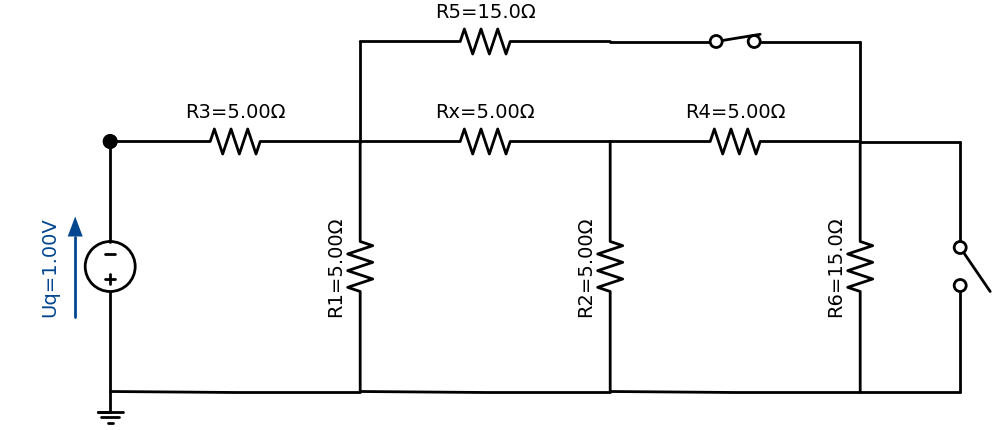

In [6]:
s['S1'].close()
s['S2'].open()
s.clear_labels()
schemdraw_solution = real_network_dc_solution(schematic=s)
s.draw()

In [7]:
circuit = circuit_translator(s)
Rdc = element_dc_resistance(circuit, 'Uq')
print(f'R={print_resistance(Rdc)}')


R=8.00Ω
